 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
                                                                                                    # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
csv_path = Path("Resources/whale_returns.csv")

#csv_path = Path("Resources/whale_analysis.csv")


In [3]:
whale_df = pd.read_csv(csv_path)
whale_df.head()
#whale_returns = pd.read_csv(whale_returns_data_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Count Nulls 
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
#Drop Nulls 
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_df = pd.read_csv(csv_path,index_col="Date",infer_datetime_format=True,parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [8]:
csv_path = Path("Resources/algo_returns.csv")

In [9]:
# Reading algorithmic returns
algo_returns = pd.read_csv(csv_path,index_col="Date",infer_datetime_format=True,parse_dates=True)
 #df = pd.read_csv('data.csv')
#algo_returns.head()
# print(df)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_data_path = Path('./Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_data_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Check Data Types
sp500_history['Close'].dtypes

dtype('O')

In [14]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')


/var/folders/l_/xpysvhrn2gg9grrc57wgmxmw0000gn/T/ipykernel_6125/1589712873.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$','')


In [15]:
sp500_history['Close'] = sp500_history['Close'].astype(float)

In [16]:
sp500_history['Close'].dtypes

dtype('float64')

In [17]:
# Calculate Daily Returns
sp500_history = sp500_history.sort_index()
daily_returns = sp500_history.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.rename(columns={ "Close": "SP500"}, inplace=True)
#daily_returns.dropna(inplace=True)
daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df, algo_returns, daily_returns], axis='columns', join='inner')
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

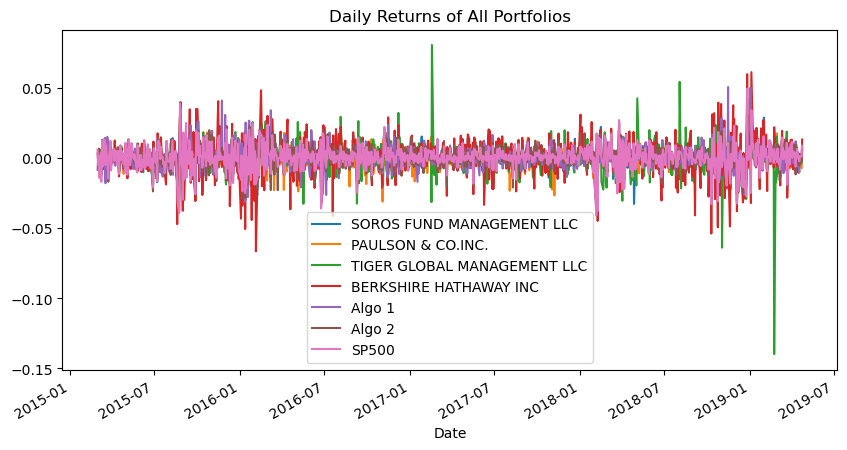

In [21]:
# Plot daily returns of all portfolios
joined_df.plot(title="Daily Returns of All Portfolios",figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot: xlabel='Date'>

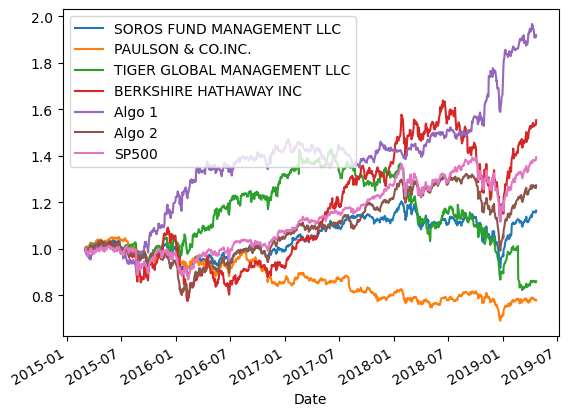

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod() 

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot: title={'center': 'Box Plot Risk'}>

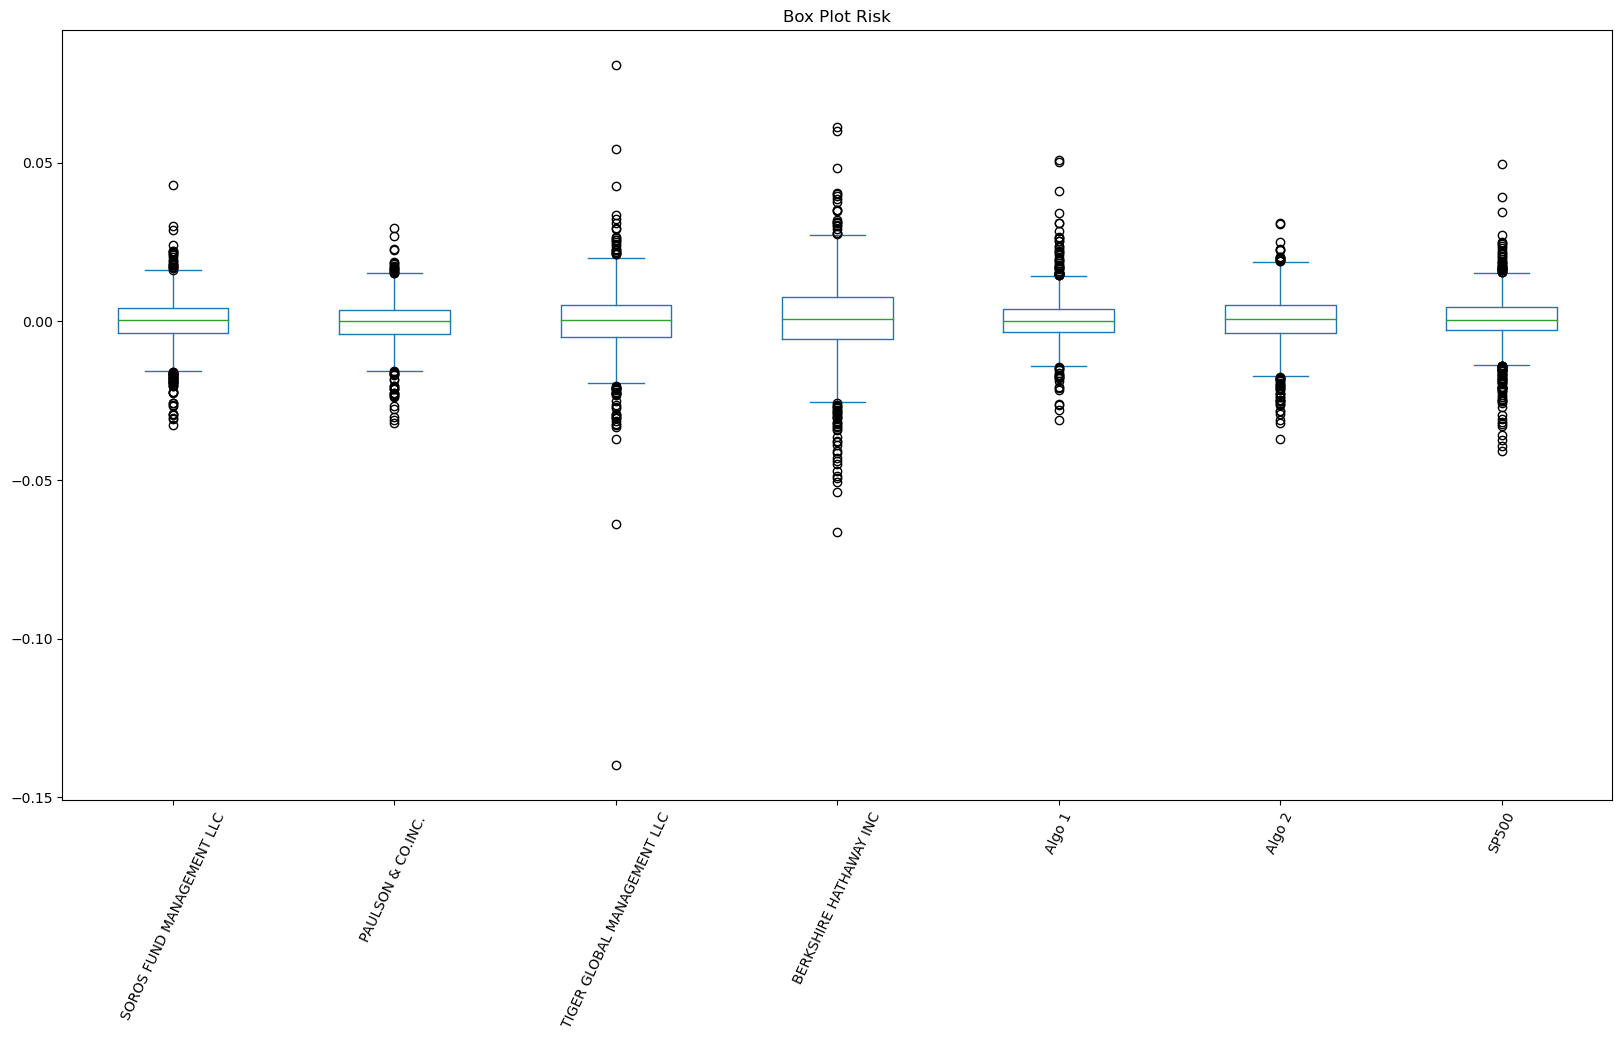

In [23]:
# Box plot to visually show risk
joined_df.plot.box(title="Box Plot Risk",figsize=(20,10),rot=65)

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
joined_std = joined_df.std()
joined_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
SP500                          0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


In [26]:
#renaming the value 
joined_df["SP500"].std()
SP500_risk = joined_df["SP500"].std()

In [27]:
SP500_risk 
#shows the value 

0.008551498507779677

In [28]:
joined_df.std() > SP500_risk
#determining the riskier portfolios

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

In [29]:
# Calculate  the daily standard deviation of S&P 500
standard_df = sp500_history.std()
joined_std.head()
# Determine which portfolios are riskier than the S&P 500
#portfolio_a_std = np.random.normal(scale=0.5, size=1000)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
dtype: float64

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = standard_df * np.sqrt(252)
annualized_std.head()
annualized_std.sort_values()

Close    6383.488916
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: xlabel='Date'>

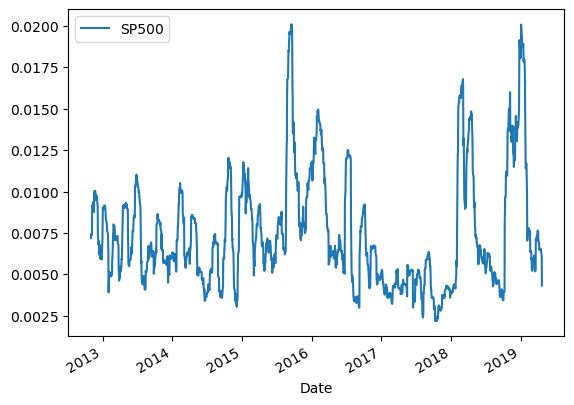

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#joined_std = joined_df.std()
#joined_std.head()
# Plot the rolling standard deviation
#joined_std.plot.box()

# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [32]:
rolling_std

,SP500
Date,
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-08,NaN
...,...
2019-04-16,0.006498
2019-04-17,0.006537
2019-04-18,0.006470


In [33]:
# Calculate the correlation
correlation = rolling_std.corr()

# Display de correlation matrix
correlation

,SP500
SP500,1.0


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [34]:
daily_returns

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [35]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [36]:
daily_returns


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


<AxesSubplot: xlabel='Date'>

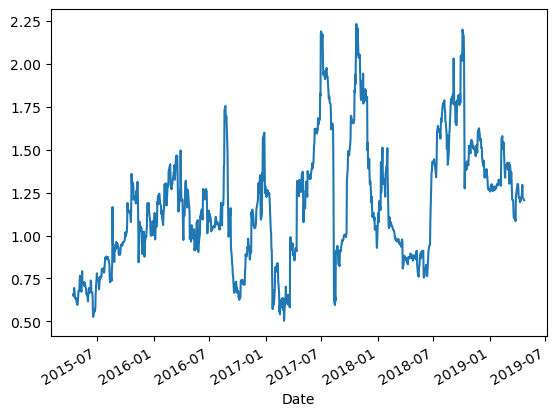

In [37]:
# Calculate covariance of a single portfolio
bh_cov = joined_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(joined_df['SP500'])
bh_cov
# Calculate variance of S&P 500
sp_var = joined_df['SP500'].rolling(window=30).var()

# Computing beta
bh_beta = bh_cov / sp_var

# Plot beta trend
bh_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [38]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
#sharpe_ratios = ((joined_df.mean()-joined_df['Close'].mean()) * 252) / (joined_df.std() * np.sqrt(252))
#sharpe_ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
SP500                          0.658706
dtype: float64

<AxesSubplot: >

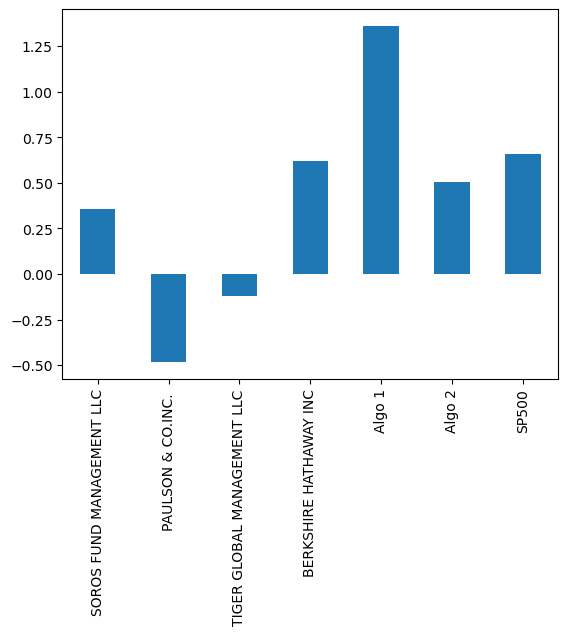

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Reading data from 1st stock
path1 = Path('./Resources/aapl_historical.csv')
appl = pd.read_csv(path1, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)

In [42]:
# Reading data from 2nd stock
path2 = Path('./Resources/goog_historical.csv')
goog = pd.read_csv(path2, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
# Reading data from 3rd stock

In [43]:
path3 = Path('./Resources/sp500_history.csv')
sp500 = pd.read_csv(path3, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [44]:
# Combine all stocks in a single DataFrame
path3 = Path('./Resources/sp500_history.csv')
sp500 = pd.read_csv(path3, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [45]:
# Reset Date index
portfolio = pd.concat([ goog, sp500], axis='columns', join='inner')

In [46]:
# Reorganize portfolio data by having a column per symbol
portfolio.drop(columns=['Symbol'], inplace=True)
portfolio.reset_index()
portfolio.sort_index(inplace=True)
portfolio.head()

,NOCP,Close
2018-05-11,1098.26,$2727.72
2018-05-14,1100.20,$2730.13
2018-05-15,1079.23,$2711.45
2018-05-16,1081.77,$2722.46
2018-05-17,1078.59,$2720.13


In [47]:

# Calculate daily returns
returns = portfolio.pct_change()

# Drop NAs
returns.dropna(inplace=True)

# Display sample data
returns.head()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!